In [1]:
import numpy as np
import pandas as pd
import backtrader as bt
import os

import datetime

## Data resampling

In [2]:
df = pd.read_csv('5m_main_contracts/IF00.csv', index_col='TRADE_DT')
df.head()

,S_INFO_CODE,S_DQ_OPEN,S_DQ_HIGH,S_DQ_LOW,S_DQ_CLOSE,S_DQ_PRESETTLE,S_DQ_ASK1,S_DQ_BID1,S_DQ_VOLUME,S_DQ_AMOUNT,S_DQ_OICHANGE,S_DQ_ADJOPEN,S_DQ_ADJHIGH,S_DQ_ADJLOW,S_DQ_ADJCLOSE,S_DQ_ADJPRESETTLE,S_DQ_ADJASK1,S_DQ_ADJBID1
TRADE_DT,,,,,,,,,,,,,,,,,,
2010-04-16 09:20:00,IF00,3450.0,3488.0,3448.0,3454.0,3399.0,3455.2,3454.2,1525,1584759660,795,3450.0,3488.0,3448.0,3454.0,3399.0,3455.2,3454.2
2010-04-16 09:25:00,IF00,3454.0,3460.0,3450.2,3456.0,3399.0,3456.6,3456.0,816,845924340,285,3454.0,3460.0,3450.2,3456.0,3399.0,3456.6,3456.0
2010-04-16 09:30:00,IF00,3456.0,3457.0,3438.0,3447.0,3399.0,3446.8,3446.0,1308,1352214000,39,3456.0,3457.0,3438.0,3447.0,3399.0,3446.8,3446.0
2010-04-16 09:35:00,IF00,3446.8,3458.2,3443.0,3451.6,3399.0,3451.8,3451.6,1298,1343218560,290,3446.8,3458.2,3443.0,3451.6,3399.0,3451.8,3451.6
2010-04-16 09:40:00,IF00,3451.0,3454.0,3443.8,3446.6,3399.0,3446.6,3446.2,1050,1086652860,146,3451.0,3454.0,3443.8,3446.6,3399.0,3446.6,3446.2


In [3]:
# Convert index to datetime
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2010-04-16 09:20:00', '2010-04-16 09:25:00',
               '2010-04-16 09:30:00', '2010-04-16 09:35:00',
               '2010-04-16 09:40:00', '2010-04-16 09:45:00',
               '2010-04-16 09:50:00', '2010-04-16 09:55:00',
               '2010-04-16 10:00:00', '2010-04-16 10:05:00',
               ...
               '2021-12-10 14:15:00', '2021-12-10 14:20:00',
               '2021-12-10 14:25:00', '2021-12-10 14:30:00',
               '2021-12-10 14:35:00', '2021-12-10 14:40:00',
               '2021-12-10 14:45:00', '2021-12-10 14:50:00',
               '2021-12-10 14:55:00', '2021-12-10 15:00:00'],
              dtype='datetime64[ns]', name='TRADE_DT', length=144360, freq=None)

In [4]:
cols = [
    'S_DQ_ADJOPEN',
    'S_DQ_ADJHIGH',
    'S_DQ_ADJLOW',
    'S_DQ_ADJCLOSE',
    'S_DQ_VOLUME',
]

df = df[cols]

In [5]:
long_df = df.resample(rule='15min', origin='start').last().dropna()
long_df

,S_DQ_ADJOPEN,S_DQ_ADJHIGH,S_DQ_ADJLOW,S_DQ_ADJCLOSE,S_DQ_VOLUME
TRADE_DT,,,,,
2010-04-16 09:20:00,3456.00,3457.00,3438.00,3447.00,1308.0
2010-04-16 09:35:00,3447.00,3451.00,3443.00,3448.00,1185.0
2010-04-16 09:50:00,3447.60,3449.80,3444.60,3448.60,1250.0
2010-04-16 10:05:00,3445.60,3446.80,3440.20,3443.20,1069.0
2010-04-16 10:20:00,3436.60,3437.80,3429.20,3431.80,1513.0
...,...,...,...,...,...
2021-12-10 13:50:00,7223.06,7226.48,7220.50,7221.07,615.0
2021-12-10 14:05:00,7213.38,7214.80,7202.56,7202.56,2015.0
2021-12-10 14:20:00,7215.66,7218.51,7211.10,7213.10,765.0


In [6]:
class MainContract(bt.feeds.PandasData):
    params = (
        ("nullvalue", np.nan),
        # ('fromdate', datetime.datetime(2010, 4, 16)),
        ("todate", datetime.datetime(2010, 4, 19)),
        ("datetime", None),  # index of the dataframe
        ("open", 0),
        ("high", 1),
        ("low", 2),
        ("close", 3),
        ("volume", 4),
        ("openinterest", -1),
    )

In [7]:
class EnhancedRSI(bt.Strategy):
    params = (
        ("period", 11),  # 参考研报
        ("thold_l", 50),
        ("thold_s", 80),
    )

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.datetime(0)
        print(f"{dt}: {txt}")

    def __init__(self):
        self.dataclose_s = self.datas[0].close
        self.dataclose_l = self.datas[1].close

        # 设置指标
        self.rsi_s = bt.ind.RSI_SMA(self.datas[0], period=self.params.period, safediv=True)
        self.rsi_l = bt.ind.RSI_SMA(self.datas[1], period=self.params.period, safediv=True)

        # 处理等待中的orders
        self.order = None

    def next(self):
        # 避免重复下订单
        if self.order:
            return
        
        # 获取当日开盘价
        today = self.datas[0].datetime.date(0)
        bar = len(self.data)
        print(today, bar)

        # 策略逻辑
        if not self.position:
            # 做多信号：长期RSI > L & 短期RSI > S
            if (self.rsi_l > self.params.thold_l) and (self.rsi_s > self.params.thold_s):
                # 做多，追踪止盈止损日内开盘价+/-2% 
                self.order = self.buy(exectype=bt.Order.StopTrail, price=None, trailpercent=0.02)
        
        else:
            # 做空信号：长期RSI < 100-L & 短期RSI < 100-S
            if (self.rsi_l < 100 - self.params.thold_l) and (self.rsi_s < 100 - self.params.thold_s):
                # 做空，追踪止盈止损日内开盘价+/-2%
                self.order = self.sell(exectype=bt.Order.StopTrail, price=None, trailpercent=0.02)
            
            # 每日收盘平仓


    def notify_order(self, order):
        # 不处理已提交或已接受的订单
        if order.status in [order.Submitted, order.Accepted]:
            return

        # 处理已完成订单
        if order.status == order.Completed:
            if order.isbuy():
                self.log(f"买入价格{order.executed.price:.2f}")
            elif order.issell():
                self.log(f"卖出价格{order.executed.price:.2f}")

            self.bar_executed = len(self)

        # 处理问题清单
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log(f"订单已被取消/拒绝... 订单状态:{order.status}")

        # Write down if no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log(f"交易收益: 毛利润 {trade.pnl:.2f}, 净利润 {trade.pnlcomm:.2f}")


In [8]:
def data_cleansing(filepath):
    """返回短期和长期价格序列"""
    # 保留字段OHLC, Volume
    cols = [
        "S_DQ_ADJOPEN",
        "S_DQ_ADJHIGH",
        "S_DQ_ADJLOW",
        "S_DQ_ADJCLOSE",
        "S_DQ_VOLUME",
    ]

    # Read .csv file and set TRADE_DT as index
    short_df = pd.read_csv(filepath, index_col="TRADE_DT")

    # 过滤字段
    short_df = short_df[cols]

    # Change TRADE_DT into datetime type
    short_df.index = pd.to_datetime(short_df.index)
    long_df = short_df.resample(rule="15min", origin="start").last().dropna()

    return short_df, long_df

In [9]:
def trading(short_df, long_df):
    # Initiate the strategy
    cerebro = bt.Cerebro()
    cerebro.addstrategy(EnhancedRSI)

    # Load datas
    data0 = MainContract(dataname=short_df)
    data1 = MainContract(dataname=long_df)

    # Add data feeds
    cerebro.adddata(data0, name="short")
    cerebro.adddata(data1, name="long")

    # Add analyser
    cerebro.addanalyzer(bt.analyzers.PyFolio, _name="pyfolio")

    # Broker setup
    cerebro.broker.setcash(100000.0)
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)
    cerebro.broker.setcommission(commission=0.002, margin=2000.0, mult=300.0)

    print(f"开始资金总额 {cerebro.broker.getvalue():.2f}")

    results = cerebro.run()

    # Analysis with pyfolio
    strats = results[0]
    pyfoliozer = strats.analyzers.getbyname("pyfolio")
    # print(pyfoliozer.get_pf_items())

    print(f"结束资金总额 {cerebro.broker.getvalue():.2f}")

    # cerebro.plot()


In [10]:
df0, df1 = data_cleansing('5m_main_contracts/IF00.csv')

df0

,S_DQ_ADJOPEN,S_DQ_ADJHIGH,S_DQ_ADJLOW,S_DQ_ADJCLOSE,S_DQ_VOLUME
TRADE_DT,,,,,
2010-04-16 09:20:00,3450.00,3488.00,3448.00,3454.00,1525
2010-04-16 09:25:00,3454.00,3460.00,3450.20,3456.00,816
2010-04-16 09:30:00,3456.00,3457.00,3438.00,3447.00,1308
2010-04-16 09:35:00,3446.80,3458.20,3443.00,3451.60,1298
2010-04-16 09:40:00,3451.00,3454.00,3443.80,3446.60,1050
...,...,...,...,...,...
2021-12-10 14:40:00,7213.38,7222.21,7212.53,7220.79,1037
2021-12-10 14:45:00,7221.07,7221.07,7214.52,7215.37,852
2021-12-10 14:50:00,7216.51,7221.64,7215.66,7219.36,1278


In [11]:
df1

,S_DQ_ADJOPEN,S_DQ_ADJHIGH,S_DQ_ADJLOW,S_DQ_ADJCLOSE,S_DQ_VOLUME
TRADE_DT,,,,,
2010-04-16 09:20:00,3456.00,3457.00,3438.00,3447.00,1308.0
2010-04-16 09:35:00,3447.00,3451.00,3443.00,3448.00,1185.0
2010-04-16 09:50:00,3447.60,3449.80,3444.60,3448.60,1250.0
2010-04-16 10:05:00,3445.60,3446.80,3440.20,3443.20,1069.0
2010-04-16 10:20:00,3436.60,3437.80,3429.20,3431.80,1513.0
...,...,...,...,...,...
2021-12-10 13:50:00,7223.06,7226.48,7220.50,7221.07,615.0
2021-12-10 14:05:00,7213.38,7214.80,7202.56,7202.56,2015.0
2021-12-10 14:20:00,7215.66,7218.51,7211.10,7213.10,765.0


In [79]:
results = pd.read_csv('results.csv', index_col='datetime')
results.index = pd.to_datetime(results.index)
results['cumrets'] = (results.timereturn + 1).cumprod()
results.drawdown = results.drawdown * -1

results.fillna(0, inplace=True)
results['pnl'] = results.pnlplus + results.pnlminus

In [80]:
results

,drawdown,maxdrawdown,timereturn,value,cash,pnlplus,pnlminus,cumrets,pnl
datetime,,,,,,,,,
2010-04-16 13:30:00,-0.0,0.00,0.0,1000000.00,1000000.00,0.0,0.0,1.000000,0.0
2010-04-16 13:35:00,-0.0,0.00,0.0,1000000.00,1000000.00,0.0,0.0,1.000000,0.0
2010-04-16 13:40:00,-0.0,0.00,0.0,1000000.00,1000000.00,0.0,0.0,1.000000,0.0
2010-04-16 13:45:00,-0.0,0.00,0.0,1000000.00,1000000.00,0.0,0.0,1.000000,0.0
2010-04-16 13:50:00,-0.0,0.00,0.0,1000000.00,1000000.00,0.0,0.0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...
2015-07-16 14:55:00,-0.2,4.73,0.0,1035493.64,1035493.64,0.0,0.0,9.283081,0.0
2015-07-16 15:00:00,-0.2,4.73,0.0,1035493.64,1035493.64,0.0,0.0,9.283081,0.0
2015-07-16 15:05:00,-0.2,4.73,0.0,1035493.64,1035493.64,0.0,0.0,9.283081,0.0


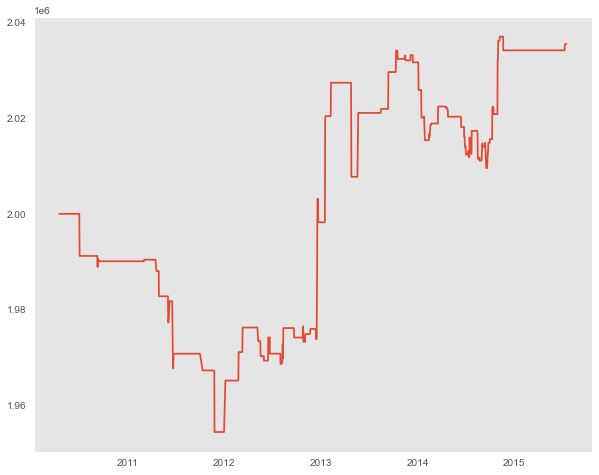

In [82]:
startcash = 1_000_000
results['pnl'][0] = results['pnl'][0] + startcash
results['net_profit'] = results['pnl'].cumsum()

fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.plot(results.net_profit)

plt.grid(False)

plt.show()

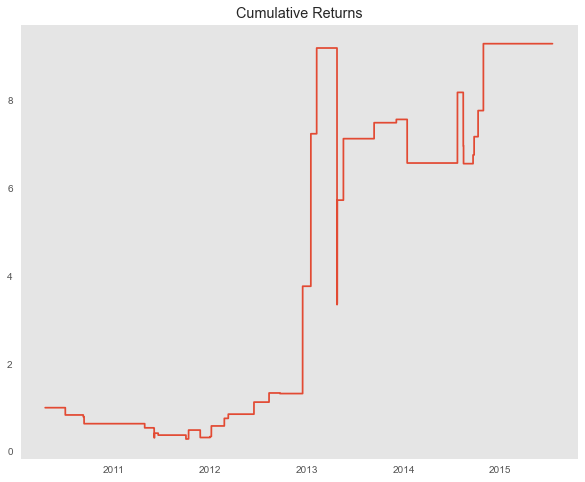

In [85]:
# Cumulative returns
fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.plot(results.cumrets)

plt.title('Cumulative Returns')
plt.grid(False)
plt.show()

In [88]:
results.timereturn.value_counts()

 0.00    68070
 0.01      399
-0.01      233
-0.02       45
 0.02       42
 0.03       26
-0.03        3
Name: timereturn, dtype: int64

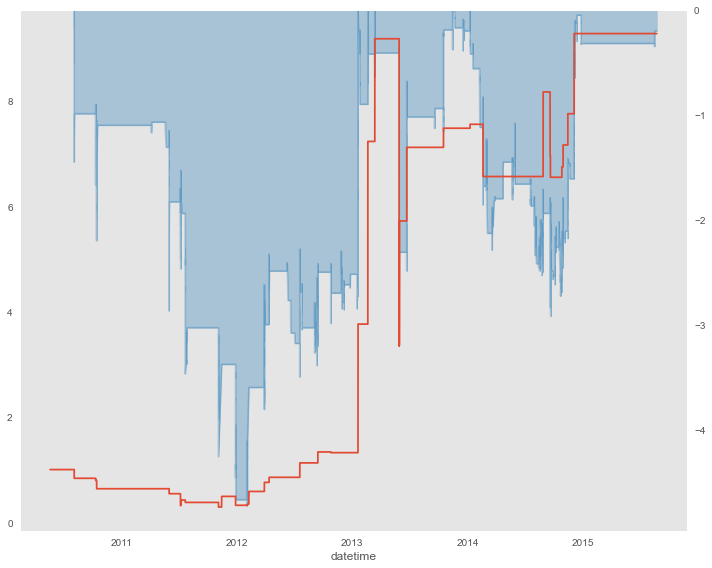

In [74]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fig, ax1 = plt.subplots(figsize=(10, 8))

ax1 = results.drawdown.plot.area(alpha=0.3, grid=False, color='tab:blue', rot=0)
ax2 = ax1.twinx()
ax2 = results.cumrets.plot(grid=False)

ax1.yaxis.set_ticks_position('right')
ax2.yaxis.set_ticks_position('left')

fig.tight_layout()
plt.show()

### 收益回撤比

In [103]:
annual_drawdown = results.resample('Y').mean()['drawdown']
annual_return = results.resample('Y').mean()['timereturn'] * 252
annual_return

datetime
2010-12-31   -0.012110
2011-12-31   -0.011667
2012-12-31    0.046475
2013-12-31    0.014118
2014-12-31    0.004000
2015-12-31    0.000000
Freq: A-DEC, Name: timereturn, dtype: float64

In [105]:
annual_return.values

array([-0.01211021, -0.01166667,  0.04647462,  0.01411765,  0.004     ,
        0.        ])

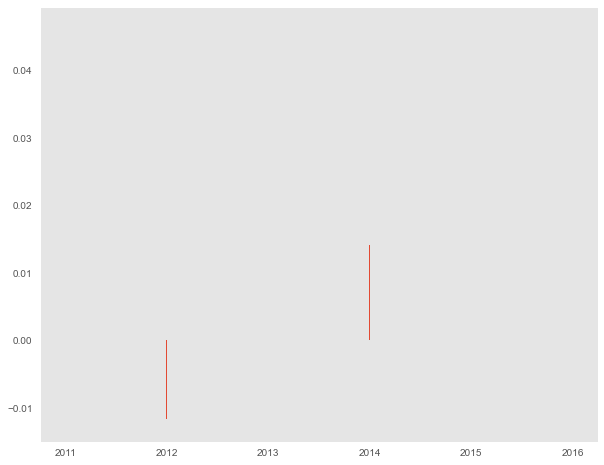

In [106]:

plt.figure(figsize=(10, 8))
plt.bar(annual_return.index, annual_return.values)

plt.grid(False)
plt.show()

In [109]:
df.loc['2010-04-19'].shape

(54, 5)